#**Travaux pratiques: Random Forest (Forêt aléatoire)**#

#**Énoncé du problème**

**In this, we have to predict the department of students based on their grades in different subjects from MSP1 to MSP2, using a classification algorithm called Random Forest.**





#**Définition**

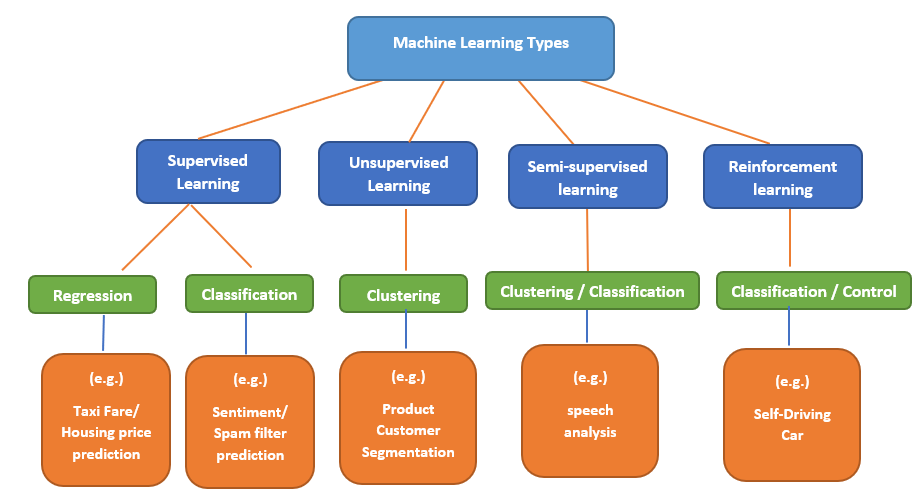

**A Random Forest Algorithm is a supervised machine learning algorithm which is extremely popular and is used for Classification and Regression problems in Machine Learning.**

#**Aspect théorique**

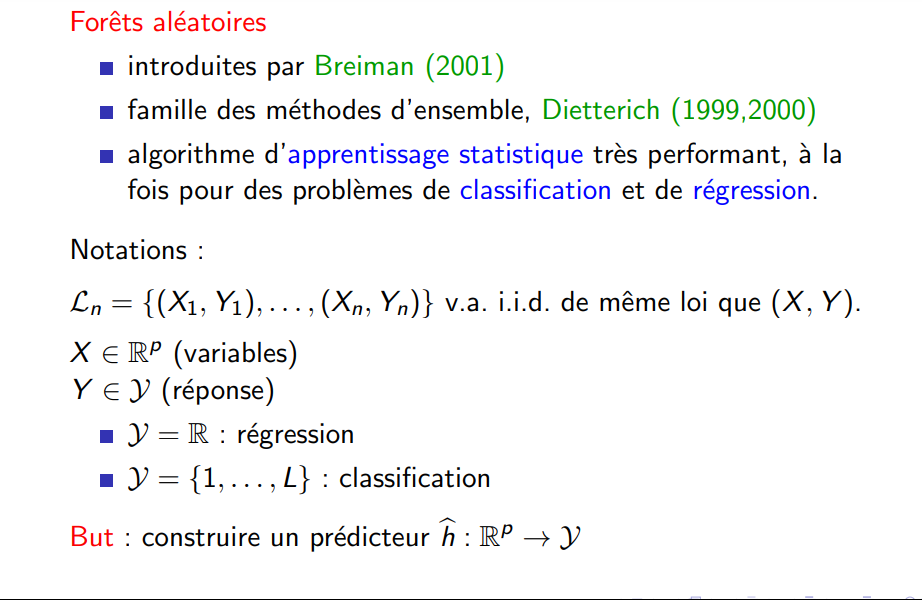

#**Un ensemble d'arbres de décision**

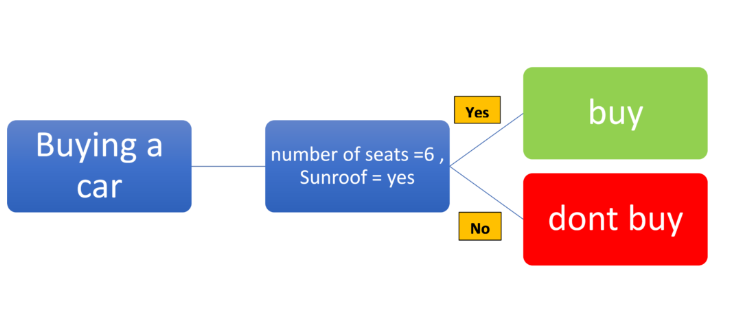

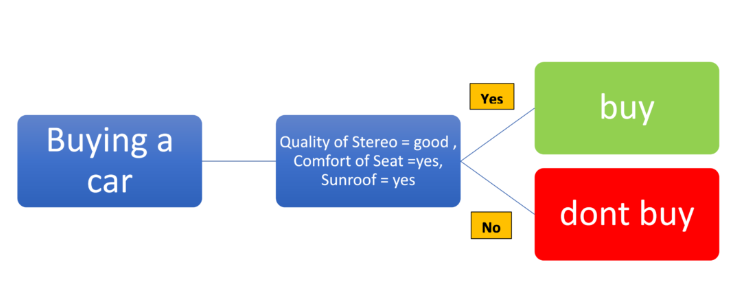

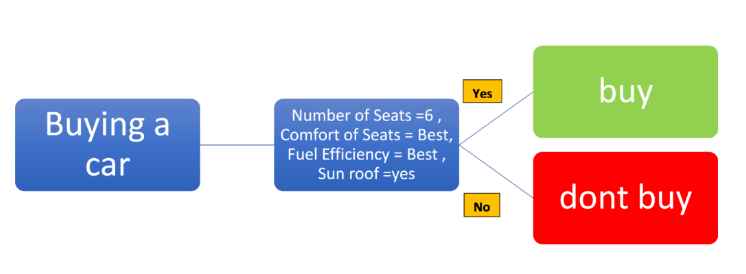

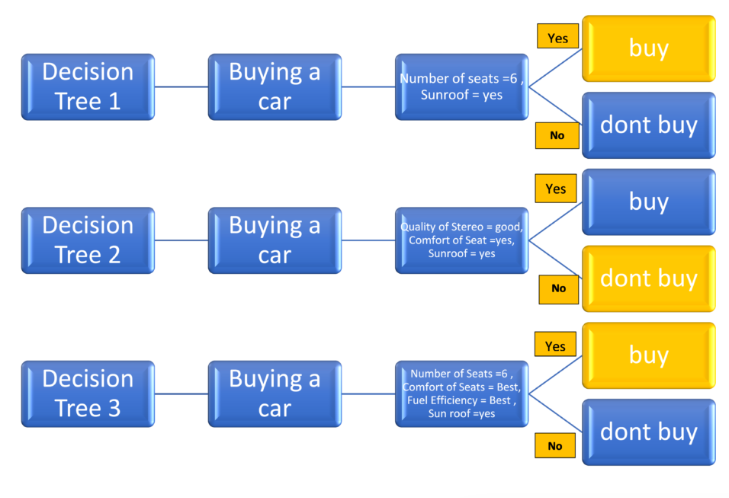

**It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.**

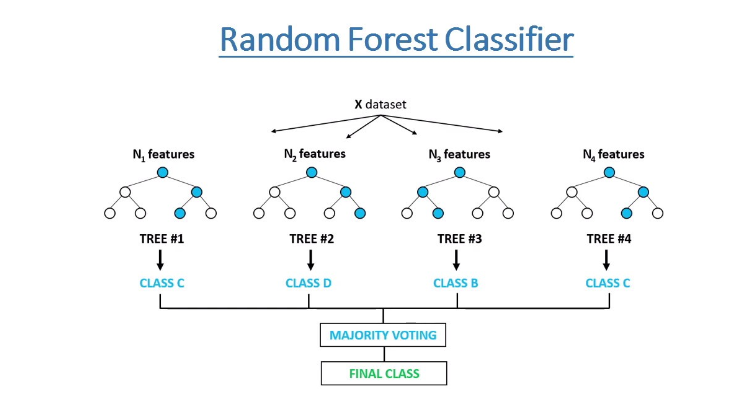

#**Importation des librairies nécessaires**


In [279]:
import numpy as np                                        # pour tout ce qui est algèbre linéaire
import pandas as pd                                       # pour le pré-traitement des données et la lecture des fichiers au format CSV par exemple
import matplotlib.pyplot as plt                           # pour la visualisation des données
import seaborn as sns                                     # pour la visualisation statistique des données
import os
from sklearn.model_selection import train_test_split      # pour diviser les données en ensemble d'entrainement et de test
from sklearn.preprocessing import StandardScaler          # pour centrer les données
from sklearn.ensemble import RandomForestClassifier       # le classifieur pour entrainer les données
from sklearn.metrics import accuracy_score                # pour mesurer la précision de notre modèle

#**Chargement du jeu de données**

In [280]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [281]:
# download the data
data = pd.read_csv("/content/drive/MyDrive/data/final_data14.csv")

#**Exploration des données**

In [282]:
#display the data
data

,Unnamed: 0,Anonymat,INF212,HUM220,MAT217,INF222,PHY223,PHY224,PHY225,MAT226,...,PHYS111,MAT_INF121,MAT_INF111,MATH 122,DES124,PHYS121,PHYS112,LAN121,HUM210,department
0,1,298,1.80,7.850,3.05,4.10,2.6,7.35,14.81,4.45,...,17.39,17.25,16.25,16.82,14.5,16.17,15.89,9.00,7.20,GIND
1,2,173,5.00,7.950,10.20,10.65,7.0,8.35,5.35,12.75,...,4.75,8.94,9.45,12.55,6.4,7.25,11.18,10.00,9.60,GIND
2,3,195,2.00,8.175,4.05,5.00,0.6,4.15,5.70,8.65,...,4.67,8.63,5.09,12.08,13.0,11.33,5.10,6.25,11.05,GM
3,4,218,9.80,6.850,12.30,6.20,2.2,1.00,5.20,2.00,...,4.11,7.34,5.44,5.30,12.3,7.85,6.41,7.80,7.50,GIND
4,5,240,11.18,12.400,12.75,15.30,16.3,16.30,16.40,17.40,...,9.19,7.57,10.16,5.80,12.1,8.02,6.72,11.00,12.20,GI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,202,250,8.25,11.200,6.95,14.70,12.6,12.50,18.20,14.60,...,12.95,7.19,12.88,11.60,8.9,9.70,12.58,11.60,10.10,GIND
137,203,281,1.30,7.700,0.80,5.35,3.2,2.68,16.90,3.05,...,7.26,5.80,12.94,11.45,9.1,11.12,7.30,9.25,9.35,GIND
138,207,306,3.90,8.650,3.10,14.20,12.8,6.15,11.60,15.85,...,8.61,5.26,9.47,7.25,9.5,10.05,8.46,8.60,8.10,GELE
139,208,307,3.65,8.800,5.50,11.50,6.6,8.85,16.80,12.70,...,6.85,5.71,10.70,7.30,9.6,9.17,9.55,6.40,5.45,GELE


In [283]:
#a summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  141 non-null    int64  
 1   Anonymat    141 non-null    int64  
 2   INF212      141 non-null    float64
 3   HUM220      141 non-null    float64
 4   MAT217      141 non-null    float64
 5   INF222      141 non-null    float64
 6   PHY223      141 non-null    float64
 7   PHY224      141 non-null    float64
 8   PHY225      141 non-null    float64
 9   MAT226      141 non-null    float64
 10  MAT227      141 non-null    float64
 11  COS211      141 non-null    float64
 12  PHY213      141 non-null    float64
 13  PHY215      141 non-null    float64
 14  PHY214      141 non-null    float64
 15  MAT216      141 non-null    float64
 16  MAT218      141 non-null    float64
 17  COS221      141 non-null    float64
 18  PHY228      141 non-null    float64
 19  MAT_INF211  141 non-null    f

In [284]:
# display columns of the data

data.columns

Index(['Unnamed: 0', 'Anonymat', 'INF212', 'HUM220', 'MAT217', 'INF222',
       'PHY223', 'PHY224', 'PHY225', 'MAT226', 'MAT227', 'COS211', 'PHY213',
       'PHY215', 'PHY214', 'MAT216', 'MAT218', 'COS221', 'PHY228',
       'MAT_INF211', 'PHYS211', 'MATH 212', 'PHYS221', 'PHYS222', 'MAT_INF221',
       'PHYS111', 'MAT_INF121', 'MAT_INF111', 'MATH 122', 'DES124', 'PHYS121',
       'PHYS112', 'LAN121', 'HUM210', 'department'],
      dtype='object')

#**Départements**

In [285]:
data['department'].value_counts(normalize=False)

GI      31
GIND    28
GELE    28
GM      24
GTEL    18
GC      12
Name: department, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


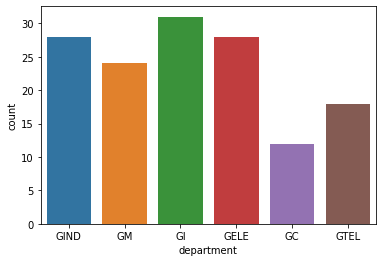

In [286]:
sns.countplot(data['department'])

#**Récupération des données importantes**

In [287]:
data = data.iloc[:,2:36]

In [288]:
print(f"Dimensions = {data.shape}")

Dimensions = (141, 33)


In [289]:
#display the data
data

,INF212,HUM220,MAT217,INF222,PHY223,PHY224,PHY225,MAT226,MAT227,COS211,...,PHYS111,MAT_INF121,MAT_INF111,MATH 122,DES124,PHYS121,PHYS112,LAN121,HUM210,department
0,1.80,7.850,3.05,4.10,2.6,7.35,14.81,4.45,3.65,16.0,...,17.39,17.25,16.25,16.82,14.5,16.17,15.89,9.00,7.20,GIND
1,5.00,7.950,10.20,10.65,7.0,8.35,5.35,12.75,8.85,15.0,...,4.75,8.94,9.45,12.55,6.4,7.25,11.18,10.00,9.60,GIND
2,2.00,8.175,4.05,5.00,0.6,4.15,5.70,8.65,2.80,16.0,...,4.67,8.63,5.09,12.08,13.0,11.33,5.10,6.25,11.05,GM
3,9.80,6.850,12.30,6.20,2.2,1.00,5.20,2.00,0.60,15.0,...,4.11,7.34,5.44,5.30,12.3,7.85,6.41,7.80,7.50,GIND
4,11.18,12.400,12.75,15.30,16.3,16.30,16.40,17.40,17.15,16.0,...,9.19,7.57,10.16,5.80,12.1,8.02,6.72,11.00,12.20,GI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,8.25,11.200,6.95,14.70,12.6,12.50,18.20,14.60,10.70,16.0,...,12.95,7.19,12.88,11.60,8.9,9.70,12.58,11.60,10.10,GIND
137,1.30,7.700,0.80,5.35,3.2,2.68,16.90,3.05,2.10,16.0,...,7.26,5.80,12.94,11.45,9.1,11.12,7.30,9.25,9.35,GIND
138,3.90,8.650,3.10,14.20,12.8,6.15,11.60,15.85,5.85,15.5,...,8.61,5.26,9.47,7.25,9.5,10.05,8.46,8.60,8.10,GELE
139,3.65,8.800,5.50,11.50,6.6,8.85,16.80,12.70,5.05,18.0,...,6.85,5.71,10.70,7.30,9.6,9.17,9.55,6.40,5.45,GELE


In [290]:
data.describe()

,INF212,HUM220,MAT217,INF222,PHY223,PHY224,PHY225,MAT226,MAT227,COS211,...,MAT_INF221,PHYS111,MAT_INF121,MAT_INF111,MATH 122,DES124,PHYS121,PHYS112,LAN121,HUM210
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,7.947021,10.673759,9.315248,11.324113,9.117021,9.271064,10.781986,11.596809,9.335106,15.464539,...,11.483191,11.274752,10.387872,12.091986,11.619645,11.768085,11.437447,10.036312,10.458511,10.938617
std,4.165298,2.752149,5.335166,3.765514,4.507022,4.685956,4.349439,3.957178,5.179533,0.923204,...,4.954190,4.586968,5.293922,3.884614,5.007931,3.292553,3.597670,3.393441,2.238566,2.715763
min,0.450000,2.900000,0.000000,2.650000,0.600000,1.000000,1.000000,2.000000,0.000000,13.000000,...,2.550000,4.110000,1.710000,3.560000,1.450000,4.950000,3.300000,4.100000,4.500000,4.800000
25%,4.550000,8.500000,4.400000,8.350000,5.600000,5.450000,7.350000,8.400000,5.050000,15.000000,...,7.470000,7.260000,5.830000,9.100000,7.300000,8.800000,8.780000,7.100000,9.050000,8.950000
50%,7.600000,10.425000,9.750000,11.350000,8.600000,8.850000,11.150000,11.800000,9.100000,16.000000,...,11.060000,11.600000,8.700000,11.710000,11.950000,12.300000,11.220000,10.040000,10.300000,10.950000
75%,10.950000,12.400000,13.550000,14.250000,12.800000,12.800000,14.600000,14.200000,13.850000,16.000000,...,16.500000,15.820000,15.270000,15.780000,16.750000,14.400000,14.370000,12.880000,11.850000,13.300000
max,17.700000,16.700000,18.650000,19.650000,19.450000,19.550000,19.100000,19.650000,19.350000,18.000000,...,19.600000,19.070000,19.740000,19.050000,19.200000,18.100000,17.970000,17.540000,16.300000,16.900000


#**Données d'entrainement et données cibles**

In [291]:
# load data in a matrix x and target data in a column vector y
x = data.iloc[:,:32]
y = data.iloc[:, 32:33]
# y = data.department
# y = data['department']
# X = data.drop(['departement'], axis=1)

In [292]:
#display x
x

,INF212,HUM220,MAT217,INF222,PHY223,PHY224,PHY225,MAT226,MAT227,COS211,...,MAT_INF221,PHYS111,MAT_INF121,MAT_INF111,MATH 122,DES124,PHYS121,PHYS112,LAN121,HUM210
0,1.80,7.850,3.05,4.10,2.6,7.35,14.81,4.45,3.65,16.0,...,4.06,17.39,17.25,16.25,16.82,14.5,16.17,15.89,9.00,7.20
1,5.00,7.950,10.20,10.65,7.0,8.35,5.35,12.75,8.85,15.0,...,5.05,4.75,8.94,9.45,12.55,6.4,7.25,11.18,10.00,9.60
2,2.00,8.175,4.05,5.00,0.6,4.15,5.70,8.65,2.80,16.0,...,8.25,4.67,8.63,5.09,12.08,13.0,11.33,5.10,6.25,11.05
3,9.80,6.850,12.30,6.20,2.2,1.00,5.20,2.00,0.60,15.0,...,2.64,4.11,7.34,5.44,5.30,12.3,7.85,6.41,7.80,7.50
4,11.18,12.400,12.75,15.30,16.3,16.30,16.40,17.40,17.15,16.0,...,16.74,9.19,7.57,10.16,5.80,12.1,8.02,6.72,11.00,12.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,8.25,11.200,6.95,14.70,12.6,12.50,18.20,14.60,10.70,16.0,...,13.21,12.95,7.19,12.88,11.60,8.9,9.70,12.58,11.60,10.10
137,1.30,7.700,0.80,5.35,3.2,2.68,16.90,3.05,2.10,16.0,...,3.33,7.26,5.80,12.94,11.45,9.1,11.12,7.30,9.25,9.35
138,3.90,8.650,3.10,14.20,12.8,6.15,11.60,15.85,5.85,15.5,...,11.76,8.61,5.26,9.47,7.25,9.5,10.05,8.46,8.60,8.10
139,3.65,8.800,5.50,11.50,6.6,8.85,16.80,12.70,5.05,18.0,...,9.59,6.85,5.71,10.70,7.30,9.6,9.17,9.55,6.40,5.45


In [293]:
#display y: the target data
y

,department
0,GIND
1,GIND
2,GM
3,GIND
4,GI
...,...
136,GIND
137,GIND
138,GELE
139,GELE


#**Séparation des données initiales en données d'entrainement et données de test**

In [294]:
# split data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [296]:
# check the shape of x_train and x_test
x_train.shape, x_test.shape

((112, 32), (29, 32))

#**Estimation et évaluation du modèle**

In [299]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

In [300]:
rf.fit(x_train, y_train)

<ipython-input-300-fc0aeedd5571>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

In [301]:
print("%.4f" % rf.oob_score_)


0.5893


In [302]:
# Check accuracy score 
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, rf.predict(x_test))))

Model accuracy score with 10 decision-trees : 0.5517


In [303]:
classifier = RandomForestClassifier(n_estimators = 10, criterion="entropy")
classifier.fit(x_train, y_train) # fit the model

<ipython-input-303-7f745a195014>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train) # fit the model


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [304]:
# Predict the Test set results
predictions = classifier.predict(x_test)
predictions

array(['GTEL', 'GTEL', 'GIND', 'GI', 'GTEL', 'GI', 'GTEL', 'GTEL', 'GIND',
       'GI', 'GIND', 'GIND', 'GIND', 'GTEL', 'GI', 'GI', 'GELE', 'GTEL',
       'GELE', 'GI', 'GM', 'GELE', 'GM', 'GIND', 'GM', 'GI', 'GELE',
       'GELE', 'GM'], dtype=object)

In [305]:
# Check accuracy score 
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score with 10 decision-trees : 0.4483
